
### **Project**: **Product Cluster Analysis**

### Overview
- The retail and wholesale distribution sector is a crucial component of the global economy, serving as a bridge between manufacturers and consumers. This sector encompasses a wide range of businesses involved in selling and distributing goods directly to end-users. It includes everything from large retail chains and independent stores to wholesale distributors and online marketplaces. By facilitating the movement of products from producers to consumers, this sector not only meets consumer demand but also drives economic growth, supports millions of jobs, and fosters innovation in product offerings and customer service.

### Getting Started
#### Objective:
- The primary objective of clustering this warehouse and retail sales data is to identify meaningful patterns and groupings within the data. This will help in understanding different aspects of sales performance, inventory management, and supplier performance. By clustering the data, we aim to make data-driven decisions that can enhance operational efficiency, optimize inventory levels, and improve sales strategies.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import locale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv("Warehouse_and_Retail_Sales.csv")

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

In [3]:
# Random Subset of DataFrame
df.sample(5)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
150659,2018,2,BRONCO WINE COMPANY,333481,FOXHOLLOW CHARD - 750ML,WINE,0.00,0.0,3.0
268652,2019,9,THE WINE GROUP,70410,FRANZIA DARK RED BLEND - 5L,WINE,54.25,50.0,29.0
200370,2019,4,CONSTANTINE WINES INC,326971,MONTEFRESCO P/GRIG - 750ML,WINE,0.00,0.0,7.0
34257,2020,3,SAZERAC CO,80127,STIRRINGS LEMON DROP COCKTAIL 6/CS - 750ML,NON-ALCOHOL,2.02,3.0,0.0
270672,2019,9,E & J GALLO WINERY,86667,RED ROCK CAL MERLOT - 750ML,WINE,4.91,14.5,6.0


In [4]:
# Total number of data count
print(f"Total number of data count: {len(df)}")

Total number of data count: 307645


In [5]:
# Shape of the data
print(f"Shape of data: {df.shape}")

Shape of data: (307645, 9)


In [6]:
# Details of DataFrame Columns and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


The dataset contains some null values, and the data types are accurately reflected.Additionally, the columns need to be renamed.

In [7]:
# The number of unique values in specific columns.
df.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              396
ITEM CODE           34056
ITEM DESCRIPTION    34822
ITEM TYPE               8
RETAIL SALES        10674
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4895
dtype: int64

In [8]:
# Descriptive Statistics of Dataset
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


Summary:

The data covers a time period from 2017 to 2020, with monthly records.
"Retail_sales", "Retail_transfers", and "Warehouse_sales" exhibit high variability, as indicated by their large standard deviations.
There are some negative values in "Retail_sales", "Retail_transfers", and "Warehouse_sales", which may indicate returns, corrections, or other adjustments.
The median values for "Retail_sales", "Retail_transfers", and "Warehouse_sales" are close to zero, suggesting that many records have low or no - ---sales/transfers for those categories.

In [9]:
# Null Value Counts per DataFrame Column
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [10]:
# DataFrame Null Values as Percentages
null_percentage = df.isnull().mean() * 100
print(null_percentage)

YEAR                0.000000
MONTH               0.000000
SUPPLIER            0.054283
ITEM CODE           0.000000
ITEM DESCRIPTION    0.000000
ITEM TYPE           0.000325
RETAIL SALES        0.000975
RETAIL TRANSFERS    0.000000
WAREHOUSE SALES     0.000000
dtype: float64


We can remove the null values since they are not significantly present in the dataset.

### Data Cleaning

In [11]:
# Dropping all the null values present in dataset
df_clean = df.dropna()

In [12]:
# renaming the columns
df_clean.rename(columns={"YEAR":"Year","MONTH":"Month","SUPPLIER":"Supplier",
                                           "ITEM CODE":"Item_code","ITEM DESCRIPTION":"Item_description",
                                           "ITEM TYPE":"Item_type","RETAIL SALES":"Retail_sales","RETAIL TRANSFERS":"Retail_transfers",
                                           "WAREHOUSE SALES":"Warehouse_sales"}, inplace=True)

In [13]:
# Updated DataFrame Column Names
df_clean.head(3)

,Year,Month,Supplier,Item_code,Item_description,Item_type,Retail_sales,Retail_transfers,Warehouse_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0


In [14]:
# Number of Duplicated Rows in the Datase
num_duplicated = df_clean.duplicated().sum()
print(f"Number of Duplicated Rows: {num_duplicated}")


Number of Duplicated Rows: 0


In [15]:
num_rows, num_columns = df_clean.shape
print(f"Shape of Cleaned DataFrame: {num_rows} rows and {num_columns} columns")

Shape of Cleaned DataFrame: 307477 rows and 9 columns


- After removing null values and duplicate entries, the dataset now contains 307,477 rows, reduced from the original 307,645 rows.

In [16]:
# Rename df_clean as df
df = df_clean

In [17]:
# List of DataFrame Column Names
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_code', 'Item_description',
       'Item_type', 'Retail_sales', 'Retail_transfers', 'Warehouse_sales'],
      dtype='object')

In [18]:
# Count of Each Unique Value in index column
df["Item_type"].value_counts()

Item_type
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64

In [19]:
# Count of Unique Item Descriptions:
df["Item_description"].nunique()

34805

In [20]:
#  Count of Suppliers:
df['Supplier'].nunique()

396

In [21]:
df.head(3)

,Year,Month,Supplier,Item_code,Item_description,Item_type,Retail_sales,Retail_transfers,Warehouse_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0


### Data Visualisation

Text(0.5, 0, 'Total count ')

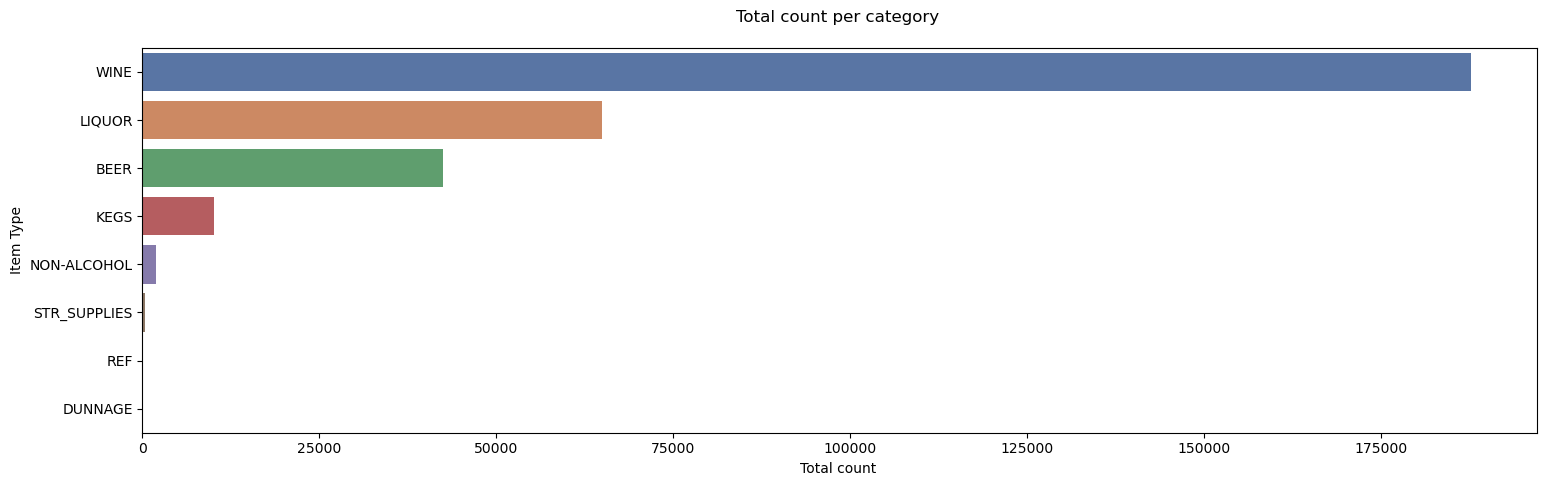

In [22]:
# Distribution of Item Types in Countplot

ItemCount = df["Item_type"].value_counts()

plt.figure(figsize=(18,5))
sns.countplot(y= df['Item_type'], order= df['Item_type'].value_counts().index, palette='deep')
plt.title('Total count per category \n')
plt.ylabel('Item Type')
plt.xlabel('Total count ')

##### Highlighting top 5 ranking (Wines, Liqueurs, Beers, Kegs, and Non-alcoholic Beverages)

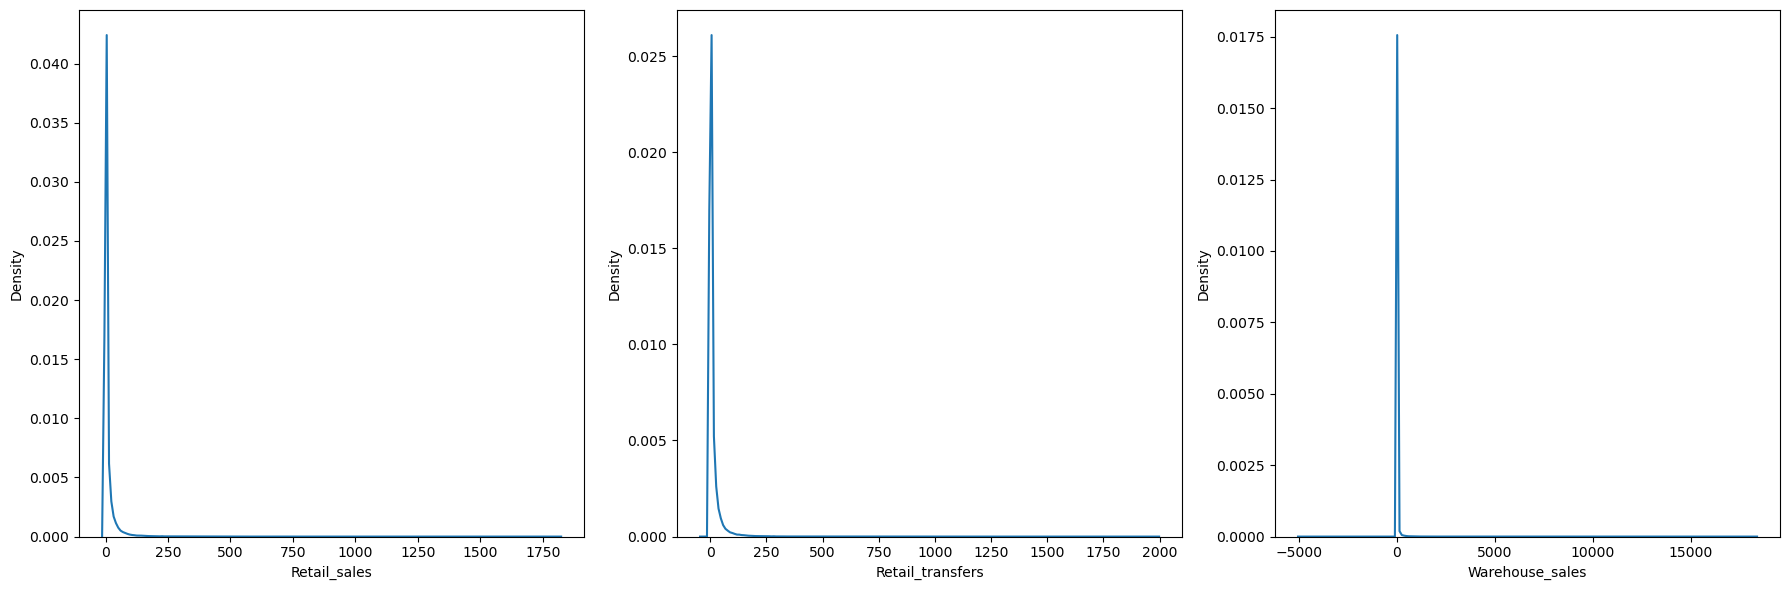

In [23]:
# Density Plot for Numerical Data
plt.figure(figsize=(18, 6))  # Adjust figure size for more subplots

# Select numerical columns excluding 'Year' and 'Month'
numerical_cols = [col for col in df.select_dtypes(exclude='object').columns
                  if col not in ['Year', 'Month']]
num_cols = len(numerical_cols)

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(1, num_cols, i + 1)  # Dynamically adjust subplot layout
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#### Summary
- The presence of more extreme values or outliers.
- Departure from a normal distribution, with a more peaked shape and heavier tails.
- Potential skewness and impact on statistical analyses.

#### Suppliers Stats

In [24]:
# The number of available beverage suppliers
suppliers_no = df['Supplier'].unique()
print("Number of registered suppliers: ", len(suppliers_no))

Number of registered suppliers:  396


In [25]:
# Top 5 beverage suppliers
supp_groupby = df.groupby('Supplier').size().nlargest()
supp_groupby

Supplier
REPUBLIC NATIONAL DISTRIBUTING CO       20994
LEGENDS LTD                             13634
SOUTHERN GLAZERS WINE AND SPIRITS       11720
E & J GALLO WINERY                      10816
THE COUNTRY VINTNER, LLC DBA WINEBOW    10669
dtype: int64

Summary: Highlighting the top five suppliers by the number of items they supply, showcasing the leading contributors in the dataset.

In [26]:
# Ranking of top suppliers by beverage category

list_item = ['WINE', 'LIQUOR', 'BEER', 'KEGS', 'NON-ALCOHOL']

for i in list_item:
    best_supplier = df[df['Item_type'] == i]['Supplier'].value_counts()[0:1]
    print(f"Top supplier of {i} {best_supplier}\n")

Top supplier of WINE Supplier
REPUBLIC NATIONAL DISTRIBUTING CO    16864
Name: count, dtype: int64

Top supplier of LIQUOR Supplier
DIAGEO NORTH AMERICA INC    6358
Name: count, dtype: int64

Top supplier of BEER Supplier
LEGENDS LTD    10479
Name: count, dtype: int64

Top supplier of KEGS Supplier
LEGENDS LTD    2549
Name: count, dtype: int64

Top supplier of NON-ALCOHOL Supplier
AMERICAN BEVERAGE MARKETERS    416
Name: count, dtype: int64



 Top suppliers for each specific item type along with the corresponding number of items they supply.








In [27]:
# Sale of Products
groups = df.groupby(['Item_type', 'Item_description'])
groups['Item_description'].size().nlargest(10)

Item_type  Item_description                         
WINE       BURGANS ALBARINO - 750ML                     44
           SANTA JULIA TORRONTES SUSTAINABLE - 750ML    39
           LA VIELLE FERME CDV RED - 750ML              35
           LINGANORE BLACK RAVEN - 750ML                34
LIQUOR     MCCLINTOCK HERITAGE WHITE WHISKEY - 750ML    33
           DAVID NICHOLSON 1843 BOURBON -750ML          32
WINE       CA LUNGHETTA P/GRIG - 750ML                  32
           LAS PERDICES VIOG - 750ML                    32
           MARIETTA OV RED - 750ML                      32
           DONA PAULA LOS CARDOS MAL - 750ML            31
Name: Item_description, dtype: int64

 It is a glimpse into the most frequently listed item descriptions within the categories of WINE and LIQUOR, along with their respective counts

In [28]:
# Verifying the records of quantity sold for a specific beverage.
burgans = df[df['Item_description'] == 'BURGANS ALBARINO - 750ML']
len(burgans)

44

In [29]:
# Top-selling beverages by category

big_wine_sold = df[df['Item_type'] == 'WINE']['Item_description'].value_counts()[0:1]
big_beer_sold = df[df['Item_type'] == 'BEER']['Item_description'].value_counts()[0:1]
big_liquor_sold = df[df['Item_type'] == 'LIQUOR']['Item_description'].value_counts()[0:1]
big_kegs_sold = df[df['Item_type'] == 'KEGS']['Item_description'].value_counts()[0:1]
big_non_alcohol_sold = df[df['Item_type'] == 'NON-ALCOHOL']['Item_description'].value_counts()[0:1]

print(f"Biggest sold WINE: {big_wine_sold}\n")
print(f"Biggest sold BEER: {big_beer_sold}\n")
print(f"Biggest sold LIQUOR: {big_liquor_sold}\n")
print(f"Biggest sold KEGS: {big_kegs_sold}\n")
print(f"Biggest sold NON-ALCOHOL: {big_non_alcohol_sold}\n")

Biggest sold WINE: Item_description
BURGANS ALBARINO - 750ML    44
Name: count, dtype: int64

Biggest sold BEER: Item_description
PRESIDENTE 2/12 NR - 12OZ    24
Name: count, dtype: int64

Biggest sold LIQUOR: Item_description
MCCLINTOCK HERITAGE WHITE WHISKEY - 750ML    33
Name: count, dtype: int64

Biggest sold KEGS: Item_description
PILSNER URQUELL 1/2K    24
Name: count, dtype: int64

Biggest sold NON-ALCOHOL: Item_description
STIRRINGS LEMON DROP COCKTAIL 6/CS - 750ML    25
Name: count, dtype: int64



The top-selling item descriptions and their respective sales counts across different categories: WINE, BEER, LIQUOR, KEGS, and NON-ALCOHOL.

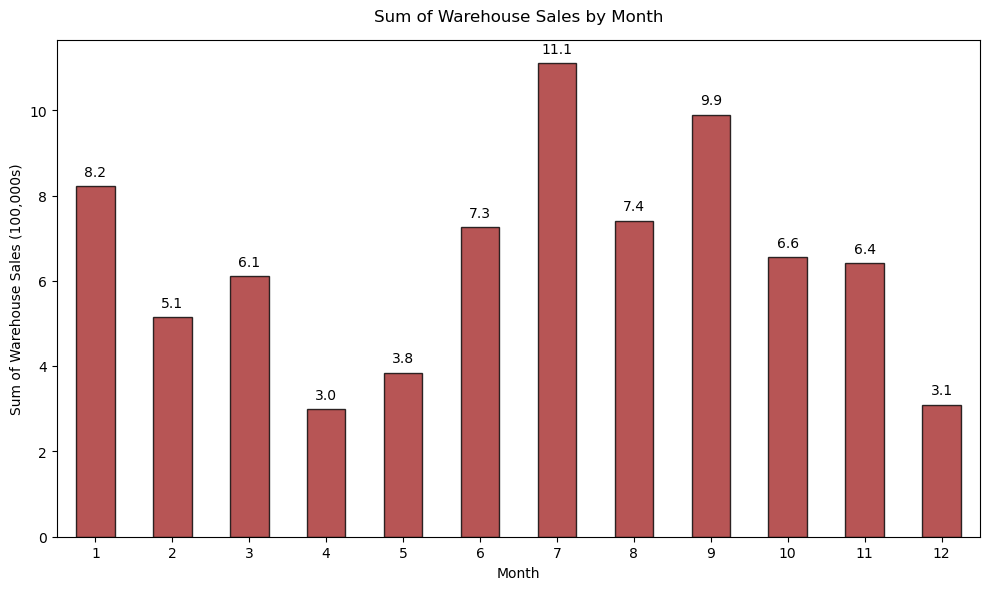

In [30]:
# Visualizing Warehouse Sales Across Different Months

sum_sales = df.groupby('Month')['Warehouse_sales'].sum()


plt.figure(figsize=(10, 6))
ax = sum_sales.plot(kind='bar', color='brown', alpha=.8, edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Sum of Warehouse Sales (100,000s)')
plt.xticks(rotation=0)


formatter = ticker.FuncFormatter(lambda x, pos: f'{x/100000:.0f}')
ax.yaxis.set_major_formatter(formatter)


for i, v in enumerate(sum_sales):
    ax.text(i, v + 50000, f'{v/100000:.1f}', ha='center', va='top', fontsize=10, c='black')



plt.title('Sum of Warehouse Sales by Month', y=1.02)


plt.tight_layout()
plt.show()

#### Summary
- Distinct seasonal trends or irregularities influencing sales performance.
- Implications for business operations, requiring strategic planning in inventory management and resource allocation.
- Critical insights into market demand, supply chain dynamics, and seasonal consumer behavior.

### Data Preprocessing

- We should remove the ITEM DESCRIPTION, SUPPLIER, and ITEM CODE columns because they are categorical and may not directly impact the clustering process.
- We should also remove the 'YEAR' and 'MONTH' columns because the data is unevenly distributed across 2017, 2018, 2019, and 2020. This uneven distribution can introduce noise and bias into the clustering process, potentially leading to inaccurate insights.

In [31]:
df.columns

Index(['Year', 'Month', 'Supplier', 'Item_code', 'Item_description',
       'Item_type', 'Retail_sales', 'Retail_transfers', 'Warehouse_sales'],
      dtype='object')

In [32]:
# Removing columns that do not contribute to model buildin
df = df.drop(['Year', 'Month', 'Supplier', 'Item_code', 'Item_description'], axis=1)

In [33]:
df = pd.get_dummies(df, columns=['Item_type'], dtype=int)

#### Scaling the DataFrame

In [36]:
# updated dataframe
df.head(3)

,Retail_sales,Retail_transfers,Warehouse_sales,Item_type_BEER,Item_type_DUNNAGE,Item_type_KEGS,Item_type_LIQUOR,Item_type_NON-ALCOHOL,Item_type_REF,Item_type_STR_SUPPLIES,Item_type_WINE
0,0.0,0.0,2.0,0,0,0,0,0,0,0,1
1,0.0,1.0,4.0,0,0,0,0,0,0,0,1
2,0.0,0.0,1.0,1,0,0,0,0,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307477 entries, 0 to 307644
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Retail_sales            307477 non-null  float64
 1   Retail_transfers        307477 non-null  float64
 2   Warehouse_sales         307477 non-null  float64
 3   Item_type_BEER          307477 non-null  int32  
 4   Item_type_DUNNAGE       307477 non-null  int32  
 5   Item_type_KEGS          307477 non-null  int32  
 6   Item_type_LIQUOR        307477 non-null  int32  
 7   Item_type_NON-ALCOHOL   307477 non-null  int32  
 8   Item_type_REF           307477 non-null  int32  
 9   Item_type_STR_SUPPLIES  307477 non-null  int32  
 10  Item_type_WINE          307477 non-null  int32  
dtypes: float64(3), int32(8)
memory usage: 18.8 MB


In [37]:
# Scaled the data using MinMaxScaler

data_for_scaling = df[['Retail_sales', 'Retail_transfers', 'Warehouse_sales']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

In [38]:
scaled_data

array([[0.0035601 , 0.01896694, 0.21438682],
       [0.0035601 , 0.01945972, 0.21447261],
       [0.0035601 , 0.01896694, 0.21434393],
       ...,
       [0.00783333, 0.01896694, 0.21447261],
       [0.0035601 , 0.01896694, 0.21438682],
       [0.0035601 , 0.01896694, 0.21434393]])

- Applied MinMax scaling to 'RETAIL SALES', 'RETAIL TRANSFERS', and 'WAREHOUSE SALES', ensuring consistent scaling between 0 and 1.
- Preserved relative feature relationships, optimizing data for clustering accuracy and enabling reliable cross-metric comparisons.

In [202]:
# creating a new DataFrame (scaled_df)
scaled_df = pd.DataFrame(scaled_data, columns=data_for_scaling.columns, index=df.index)
scaled_df.head(3)

,Retail_sales,Retail_transfers,Warehouse_sales
0,0.00356,0.018967,0.214387
1,0.00356,0.019460,0.214473
2,0.00356,0.018967,0.214344


In [40]:
drop_df = df.drop(['Retail_sales', 'Retail_transfers', 'Warehouse_sales'], axis=1)

# concat with scaled data
new_df = pd.concat([drop_df, scaled_df], axis=1)
new_df.head(3)

,Item_type_BEER,Item_type_DUNNAGE,Item_type_KEGS,Item_type_LIQUOR,Item_type_NON-ALCOHOL,Item_type_REF,Item_type_STR_SUPPLIES,Item_type_WINE,Retail_sales,Retail_transfers,Warehouse_sales
0,0,0,0,0,0,0,0,1,0.00356,0.018967,0.214387
1,0,0,0,0,0,0,0,1,0.00356,0.019460,0.214473
2,1,0,0,0,0,0,0,0,0.00356,0.018967,0.214344


Visualizing Distributions of DataFrame Columns

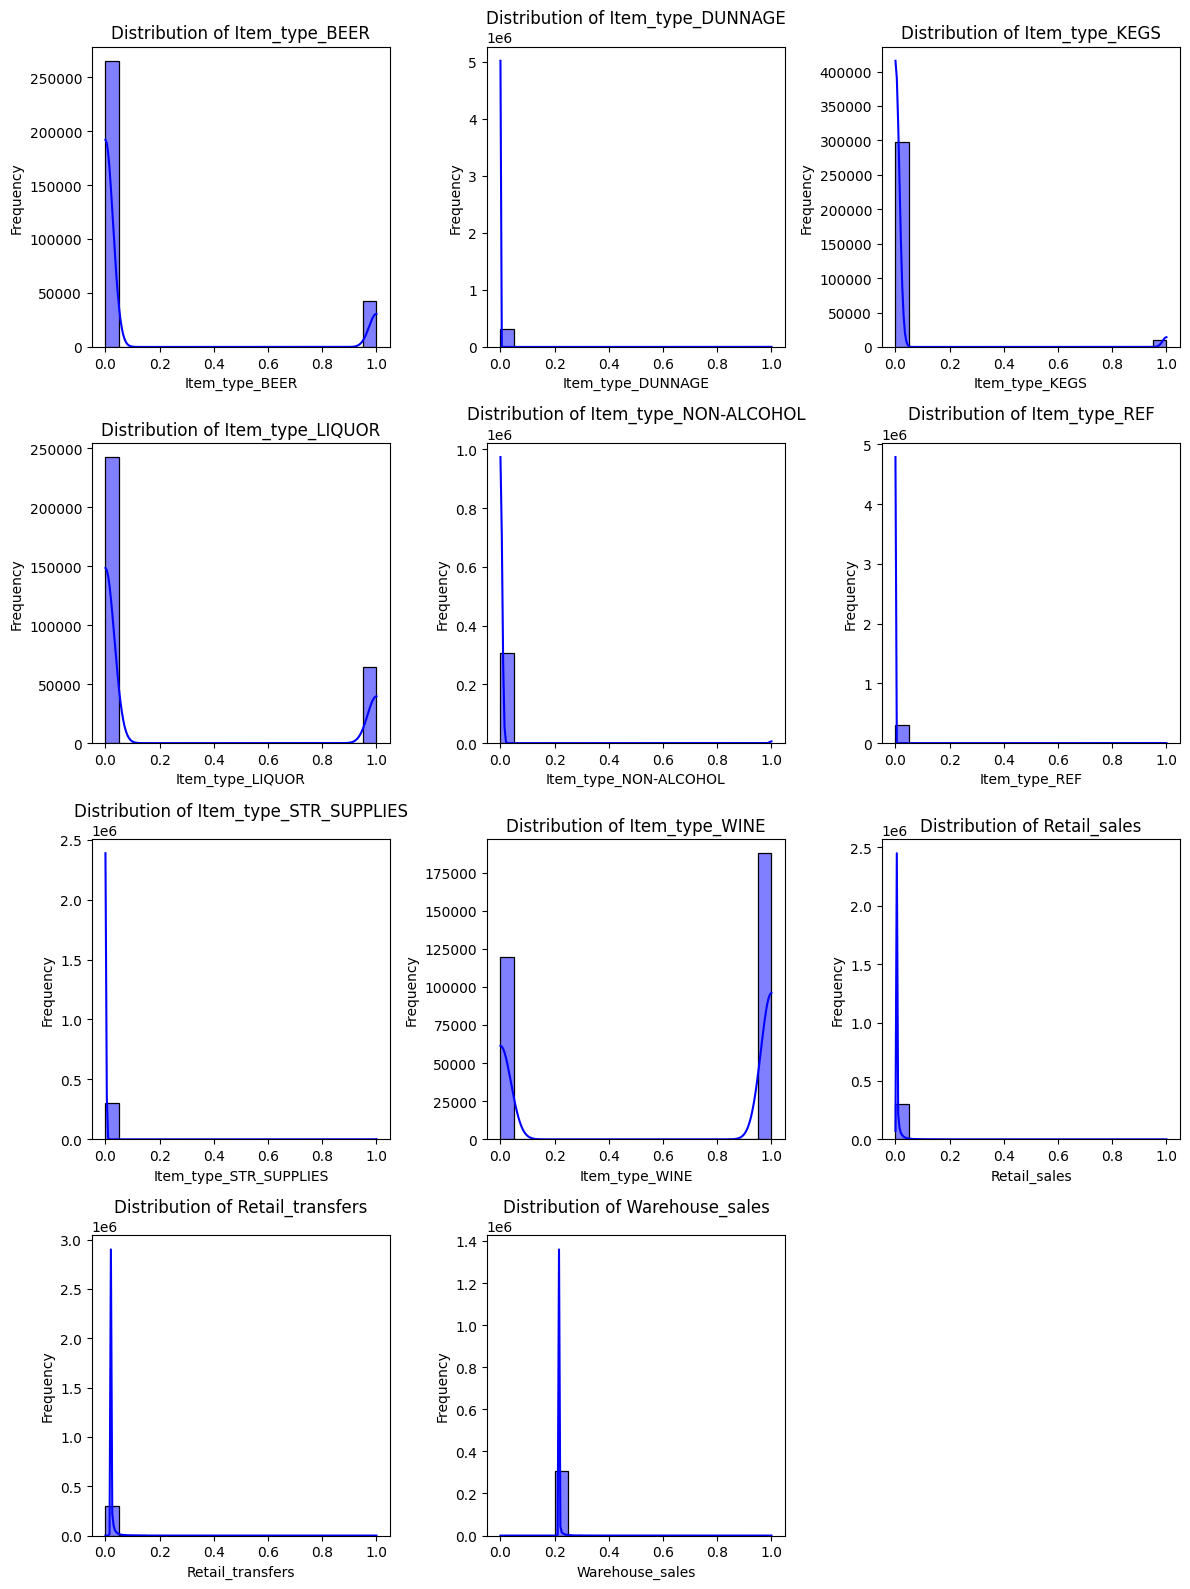

In [41]:
# Calculate the number of rows for subplots based on number of columns
num_cols = len(new_df.columns)
num_rows = (num_cols + 2) // 3  # Round up to nearest multiple of 3

# Plotting the distribution of new data
plt.figure(figsize=(12, 4 * num_rows))  # Adjust figure height based on rows

# Iterate over column names instead of indices
for i, col in enumerate(new_df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(new_df[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Hyperparameter Tuning
Finding 'k' value by Elbow Method

In [42]:
## Manual Process
## Elbow Method to select the K values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)

In [43]:
wcss

[173257.19243116758,
 68963.61268136314,
 20420.52555514869,
 4175.153369890537,
 981.7765534568333,
 413.1525893921074,
 259.3234216376144,
 183.78791156603407,
 125.32828767754415,
 98.82205090675436]

- Look for the "elbow" point where adding more clusters provides diminishing returns in reducing WCSS.
- Lower WCSS values indicate better cluster cohesion, but too many clusters can lead to overfitting.
- Balancing model complexity and fit is crucial for choosing an effective number of clusters that aligns with interpretability and practical insights.

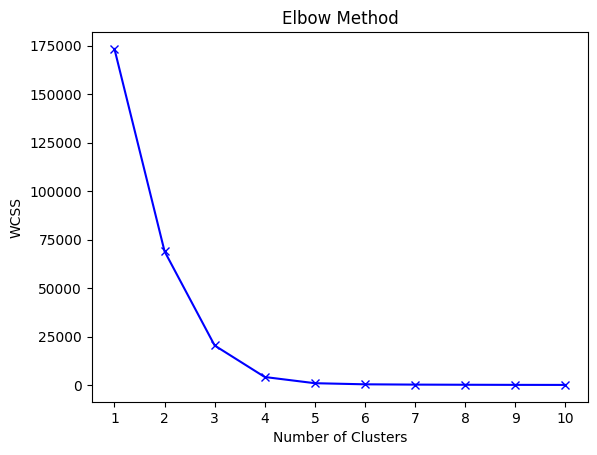

In [44]:
# Elbow Curve Plot for Cluster Validation

plt.plot(range(1, 11), wcss, 'bx-')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The elbow curve analysis indicates that the optimal number of clusters for the dataset occurs where the curve bends sharply. In our case, this bend is observed at the 3th cluster

In [45]:
## knee locator

!pip install kneed

In [46]:
from kneed import KneeLocator

In [47]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
print(f"Optimal number of cluster is: {kl.elbow}")

Optimal number of cluster is: 3


knee locator is a practical tool for determining the optimal number of clusters in clustering analysis

### Model Building using KMeans

In [48]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster = kmeans.fit_predict(new_df)
clusters = pd.Series(cluster, name='clusters')
clusters.value_counts()

clusters
0    187640
1     64910
2     54927
Name: count, dtype: int64

In [49]:
cluster_df = pd.concat([new_df, clusters], axis=1)

In [104]:
cluster_df.isnull().sum()

Item_type_BEER            0
Item_type_DUNNAGE         0
Item_type_KEGS            0
Item_type_LIQUOR          0
Item_type_NON-ALCOHOL     0
Item_type_REF             0
Item_type_STR_SUPPLIES    0
Item_type_WINE            0
Retail_sales              0
Retail_transfers          0
Warehouse_sales           0
clusters                  0
dtype: int64

In [103]:
for column in cluster_df.columns:
    cluster_df[column] = cluster_df[column].fillna(cluster_df[column].mode()[0])

In [52]:
cluster_df["clusters"] = cluster_df["clusters"].astype(int)

In [53]:
cluster_df.head(3)

,Item_type_BEER,Item_type_DUNNAGE,Item_type_KEGS,Item_type_LIQUOR,Item_type_NON-ALCOHOL,Item_type_REF,Item_type_STR_SUPPLIES,Item_type_WINE,Retail_sales,Retail_transfers,Warehouse_sales,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00356,0.018967,0.214387,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00356,0.019460,0.214473,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00356,0.018967,0.214344,2


### Visualizing the clustered dataframe

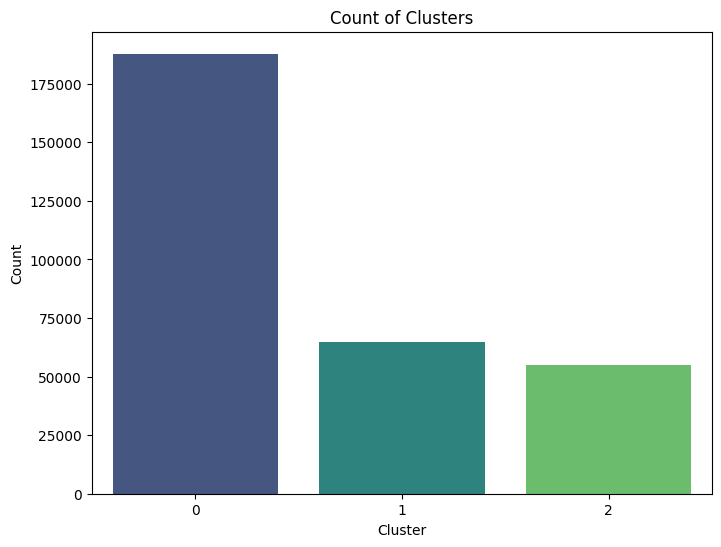

In [105]:
# Calculate value counts of clusters
cluster_counts = cluster_df['clusters'].value_counts().reset_index()
cluster_counts.columns = ['clusters', 'counts']

# Plotting the countplot
plt.figure(figsize=(8, 6))
sns.barplot(x='clusters', y='counts', data=cluster_counts, palette='viridis')
plt.title('Count of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [106]:
# Cluster Column Value Distribution
cluster_df['clusters'].value_counts()

clusters
0    187806
1     64910
2     54927
Name: count, dtype: int64

In [56]:
# DataFrame Initialization: Cluster Field with Value 0
cluster_1_df = cluster_df[cluster_df['clusters']==0]
cluster_1_df.head()

,Item_type_BEER,Item_type_DUNNAGE,Item_type_KEGS,Item_type_LIQUOR,Item_type_NON-ALCOHOL,Item_type_REF,Item_type_STR_SUPPLIES,Item_type_WINE,Retail_sales,Retail_transfers,Warehouse_sales,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003560,0.018967,0.214387,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003560,0.019460,0.214473,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003560,0.018967,0.214344,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.004010,0.018967,0.214301,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005074,0.018967,0.214558,0


In [57]:
#DataFrame Initialization: Cluster Field with Value 1
cluster_2_df = cluster_df[cluster_df['clusters']==1]
cluster_2_df.head()

,Item_type_BEER,Item_type_DUNNAGE,Item_type_KEGS,Item_type_LIQUOR,Item_type_NON-ALCOHOL,Item_type_REF,Item_type_STR_SUPPLIES,Item_type_WINE,Retail_sales,Retail_transfers,Warehouse_sales,clusters
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.007076,0.020938,0.214301,1
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.004493,0.019460,0.214301,1
11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.004120,0.018967,0.214301,1
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.003933,0.018967,0.214301,1
13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.003747,0.018967,0.214301,1


In [58]:
# DataFrame Initialization: Cluster Field with Value 2
cluster_3_df = cluster_df[cluster_df['clusters']==2]
cluster_3_df.head()

,Item_type_BEER,Item_type_DUNNAGE,Item_type_KEGS,Item_type_LIQUOR,Item_type_NON-ALCOHOL,Item_type_REF,Item_type_STR_SUPPLIES,Item_type_WINE,Retail_sales,Retail_transfers,Warehouse_sales,clusters
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003560,0.018967,0.214344,2
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003560,0.018967,0.214387,2
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.003615,0.018967,0.214301,2
33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003560,0.018967,0.214687,2
41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004657,0.019952,0.214301,2


Cluster 0 exhibits significantly higher data volume compared to clusters 1 and 2.

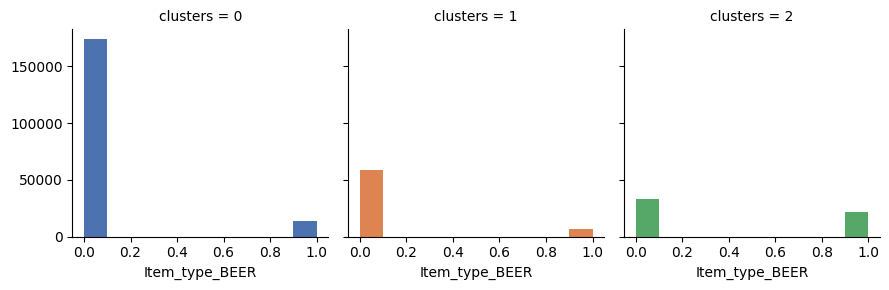

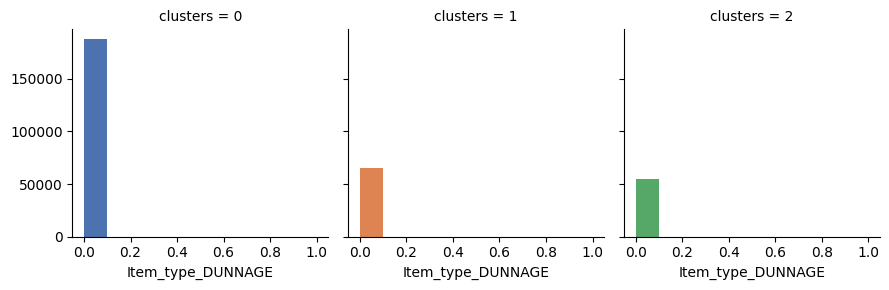

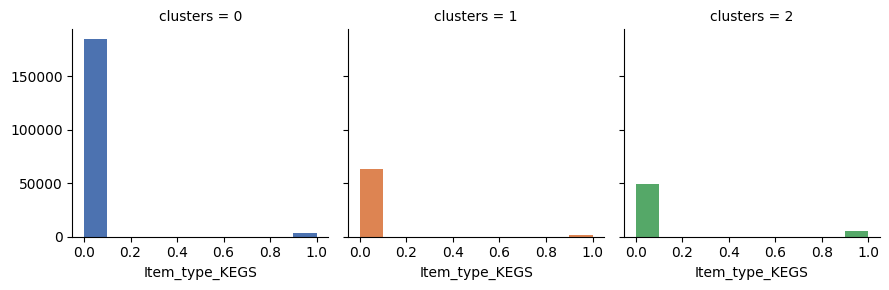

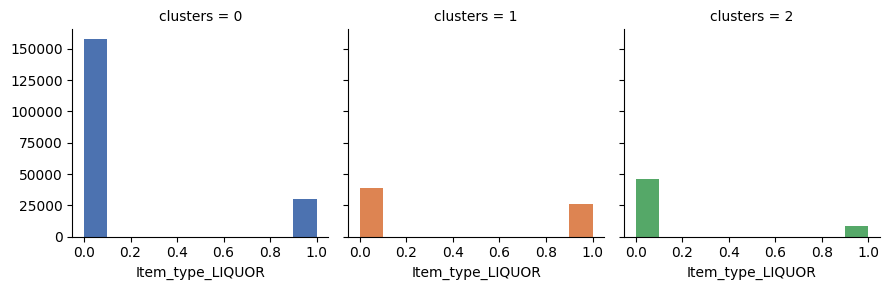

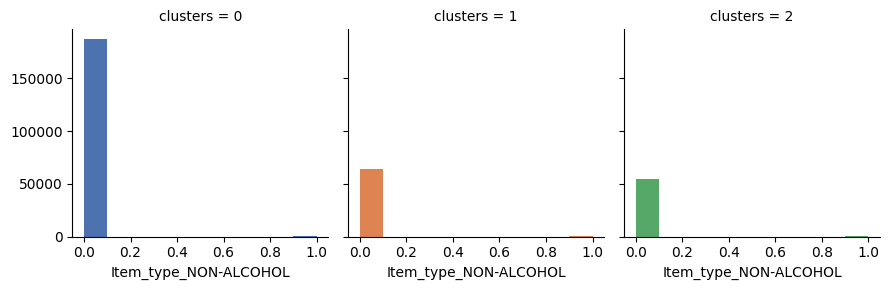

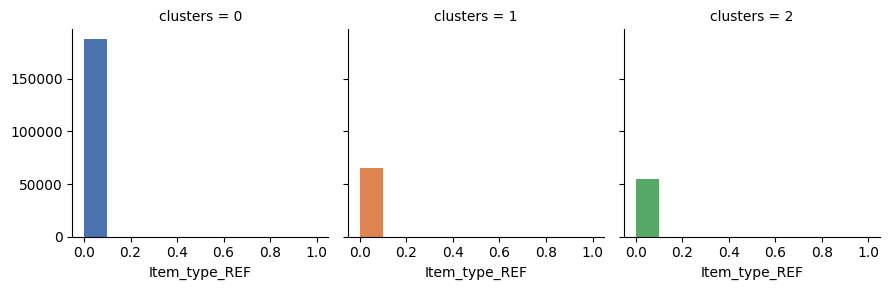

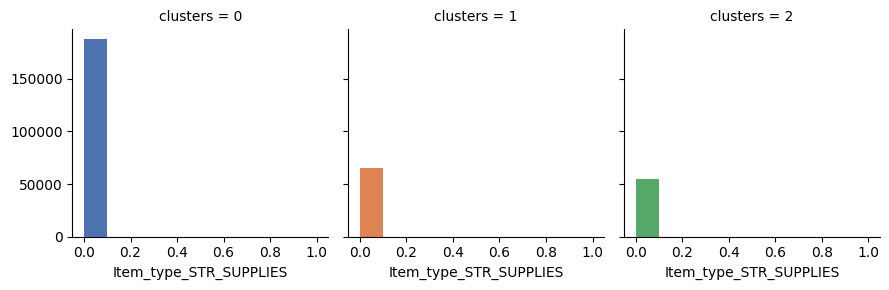

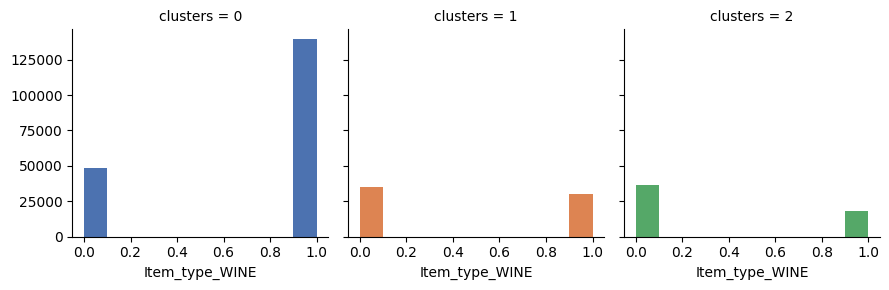

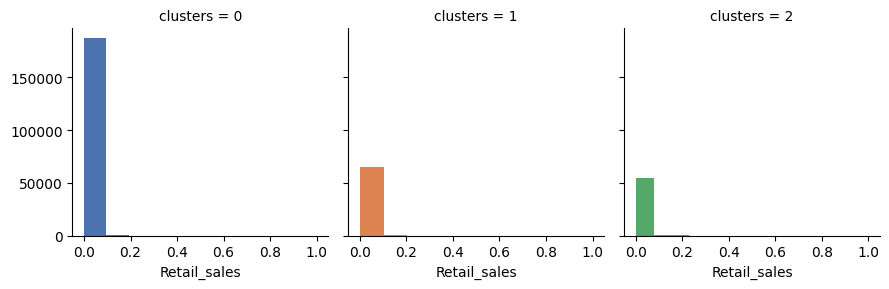

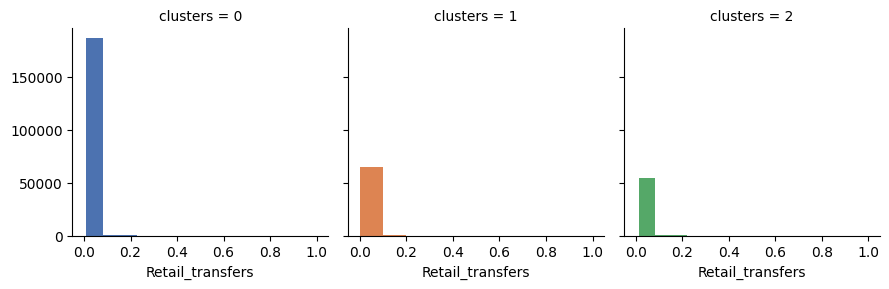

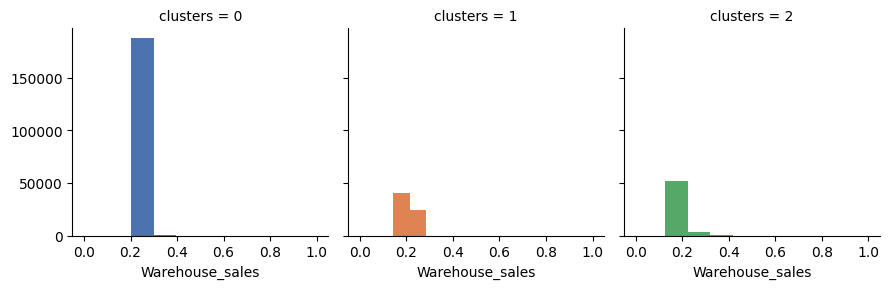

In [59]:
# Multi-plot Visualization Using FacetGrid

for c in cluster_df.drop(columns=['clusters']):
  grid = sns.FacetGrid(cluster_df, col='clusters', hue='clusters', palette='deep')
  grid.map(plt.hist, c)
  grid = grid.map(plt.hist, c)
plt.show()

### Saving the kmeans clustering model and data with cluster label

In [60]:
# Saving Scikit-learn models
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl'),joblib.dump(scaler, 'scaler.pkl')

(['kmeans_model.pkl'], ['scaler.pkl'])

In [61]:
cluster_df.to_csv('Clustered_Customer_Data.csv')

### Silhouette Scores
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [67]:
# Import the silhouette_score function
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(4,9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)

For n_clusters = 4, the average silhouette_score is 0.9801336399193947
For n_clusters = 5, the average silhouette_score is 0.9904699802388052
For n_clusters = 6, the average silhouette_score is 0.9922943202642543
For n_clusters = 7, the average silhouette_score is 0.9927840586955179
For n_clusters = 8, the average silhouette_score is 0.9930238895825557


"Peak at 8 clusters: The highest silhouette score (0.9930) indicates the best clustering quality."

In [79]:
silhouette_scores

[0.9801336399193947,
 0.9904699802388052,
 0.9922943202642543,
 0.9927840586955179,
 0.9930238895825557]

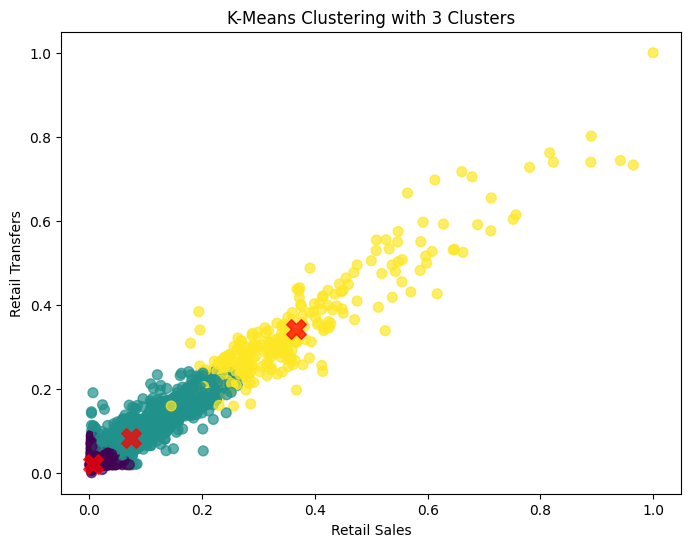

In [90]:
# Visualize clustering results
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {n_clusters} Clusters')
plt.xlabel('Retail Sales')
plt.ylabel('Retail Transfers')
plt.show()

Summary : The clusters appear linear but overlap, prompting evaluation using the silhouette coefficient to assess and refine their distinctiveness and separation.

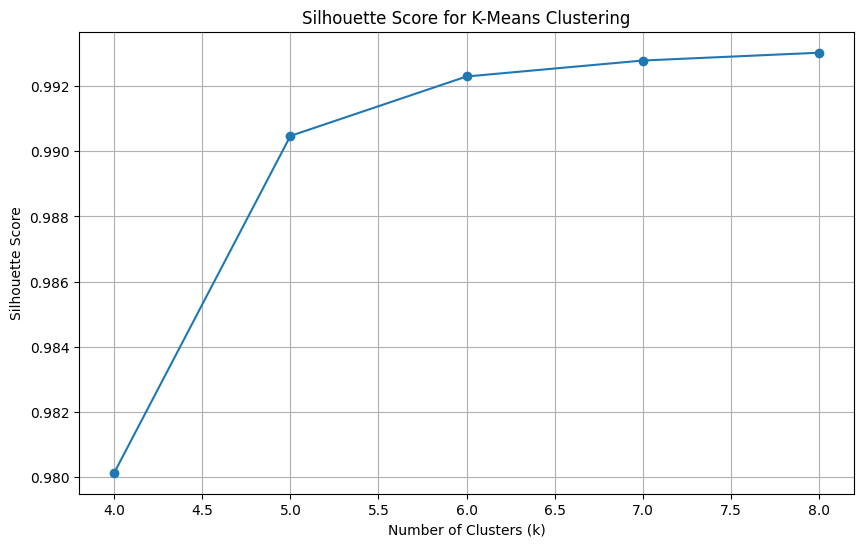

In [71]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(4, 9), silhouette_scores, marker='o') # Use range(4,9) to match the number of clusters used
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.grid(True)
plt.show()

#### Summary
- In this specific plot, the silhouette score increases as the number of clusters increases from 4 to 8. This means that the data points might be better represented by a higher number of clusters in this range.
-  For instance, if the data naturally falls into 5 categories based on real-world factors, that would be a strong indicator for using 5 clusters.

### K-Means Total Data

In [74]:
# maximum from silhouette score
max_score = max(silhouette_scores)
print(f"Maximum Silhouette Score: {max_score}")

Maximum Silhouette Score: 0.9930238895825557


In [83]:
new_df.columns

Index(['Item_type_BEER', 'Item_type_DUNNAGE', 'Item_type_KEGS',
       'Item_type_LIQUOR', 'Item_type_NON-ALCOHOL', 'Item_type_REF',
       'Item_type_STR_SUPPLIES', 'Item_type_WINE', 'Retail_sales',
       'Retail_transfers', 'Warehouse_sales'],
      dtype='object')

#### Clustering of Warehouse Sales and Retail Sales

5 clusters

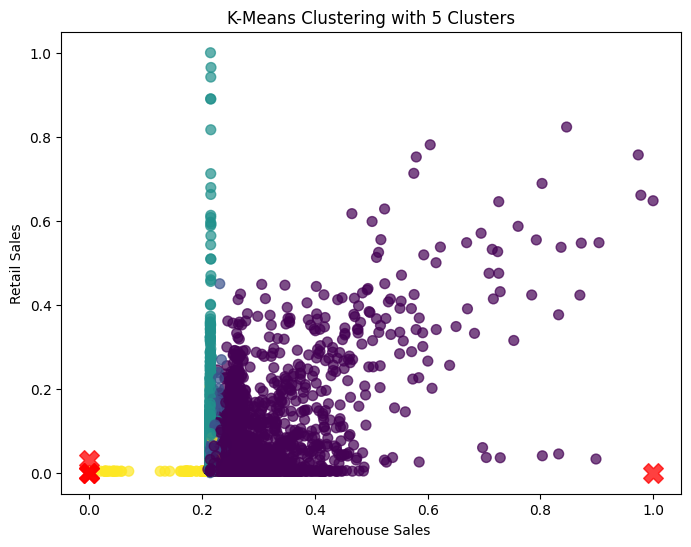

In [203]:
best_k = 5
range_n_clusters = list(range(2, 2 + len(silhouette_scores)))

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=0)
cluster_labels = kmeans.fit_predict(new_df)


# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(new_df['Warehouse_sales'], new_df["Retail_sales"], c=cluster_labels, s=50, cmap='viridis', alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {best_k} Clusters')
plt.xlabel('Warehouse Sales')
plt.ylabel('Retail Sales')
plt.show()


#### Summary:
- Cluster 1 (Upper left): This cluster appears to group data points with relatively high values on both dimensions visualized in the plot.
- Cluster 2 (Upper right): This cluster likely consists of data points with high values on the first dimension (X-axis) and lower values on the second dimension (Y-axis).
- Cluster 3 (Center): This cluster may contain data points with mid-range values on both dimensions.
- Cluster 4 (Lower left): This cluster appears to group data points with relatively low values on the first dimension and higher values on the second dimension.
- Cluster 5 (Lower right): This cluster likely consists of data points with low values on both dimensions visualized in the plot.

## Clustering Evaluation Matix

In [131]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [139]:
X = cluster_df.drop(columns=['clusters'], axis=1)
y = cluster_df['clusters']

In [140]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df['clusters'] = kmeans.labels_

# Calculate metrics
dbi = davies_bouldin_score(X, cluster_df['clusters'])
chi = calinski_harabasz_score(X, cluster_df['clusters'])

print(f'Davies-Bouldin Index: {dbi}')
print(f'Calinski-Harabasz Index: {chi}')

Davies-Bouldin Index: 0.3925479398779604
Calinski-Harabasz Index: 1151530.75332033


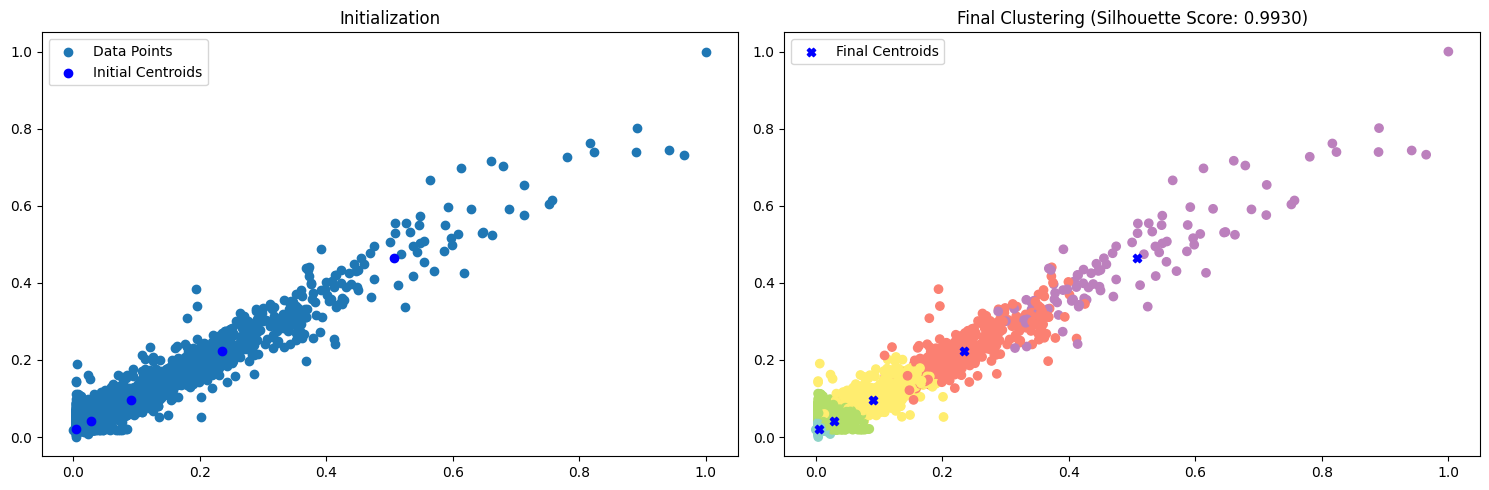

In [85]:
# Evaluation of K-means Clustering (5 Clusters) Using Silhouette Score

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

ax = axes[0]
ax.scatter(scaled_data[:, 0],scaled_data[:, 1], label='Data Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='o', label='Initial Centroids')
ax.set_title('Initialization')
ax.legend()

ax = axes[1]
# Assign cluster labels to each data point
cluster_labels = kmeans.predict(scaled_data)
# Use cluster labels as color values
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='Set3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', marker='X', label='Final Centroids')
ax.set_title(f'Final Clustering (Silhouette Score: {silhouette_avg:.4f})')
ax.legend()

plt.tight_layout()
plt.show()

#### Summary
- Since the silhouette score is very high (0.9930), we can conclude that the k-means algorithm has successfully grouped the data points into clusters that are well-separated. In other words, the points within a cluster are closer together than they are to points in other clusters.

#### Mini-Batch KMeans

In [142]:
from sklearn.cluster import MiniBatchKMeans

In [144]:
# Perform Mini-Batch K-means clustering
best_k = 5  # Use your optimal number of clusters
minibatch_kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=0)
cluster_df['mini_batch_cluster'] = minibatch_kmeans.fit_predict(X)

In [145]:
cluster_df['mini_batch_cluster']

0         0
1         0
2         3
3         0
4         0
         ..
301170    0
303009    0
306784    0
307259    0
307304    0
Name: mini_batch_cluster, Length: 307643, dtype: int32

In [146]:
# Calculate silhouette score for mini batch cluster
silhouette_avg = silhouette_score(X, cluster_df['mini_batch_cluster'])
print(f'Mini-Batch Silhouette Score: {silhouette_avg}')

Mini-Batch Silhouette Score: 0.8327124449003688


In [147]:
dbi = davies_bouldin_score(X, cluster_df['clusters'])
chi = calinski_harabasz_score(X, cluster_df['clusters'])

print(f'Davies-Bouldin Index for mini bath cluster: {dbi}')
print(f'Calinski-Harabasz Index for mini bath cluster: {chi}')

Davies-Bouldin Index for mini bath cluster: 0.3925479398779604
Calinski-Harabasz Index for mini bath cluster: 1151530.75332033


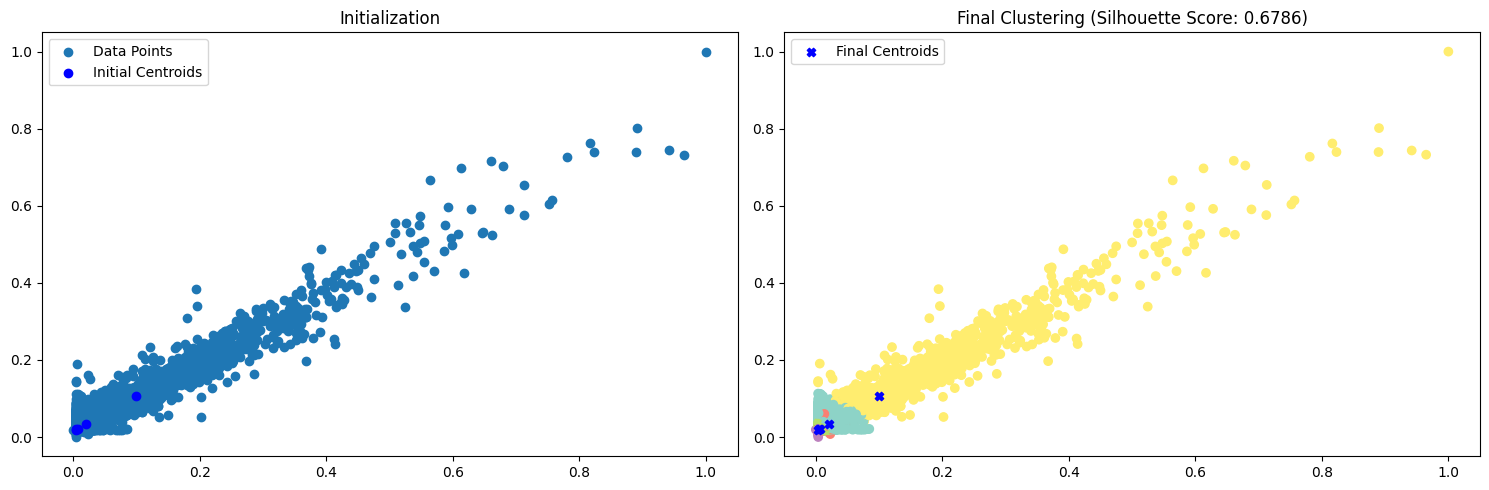

In [174]:
num_clusters = 5
batch_size = 100

# Initialize MiniBatchKMeans
mini_batch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size, random_state=42)
mini_batch_kmeans.fit(scaled_data)

# Calculate silhouette score
cluster_labels = mini_batch_kmeans.predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)

# Plot initialization and final clustering
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()

# Plot initialization
ax = axes[0]
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], label='Data Points')
ax.scatter(mini_batch_kmeans.cluster_centers_[:, 0], mini_batch_kmeans.cluster_centers_[:, 1],
           c='blue', marker='o', label='Initial Centroids')
ax.set_title('Initialization')
ax.legend()

# Plot final clustering
ax = axes[1]
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='Set3')
ax.scatter(mini_batch_kmeans.cluster_centers_[:, 0], mini_batch_kmeans.cluster_centers_[:, 1],
           c='blue', marker='X', label='Final Centroids')
ax.set_title(f'Final Clustering (Silhouette Score: {silhouette_avg:.4f})')
ax.legend()

plt.tight_layout()
plt.show()


- The silhouette score of 0.6786 is considered to be a good score, but it's not as high as the 0.993 score we discussed previously. This suggests that the k-means algorithm may have been somewhat successful in grouping the data points, but the separation between the clusters might not be idea

### Strategic Approach to Beverage Market Optimization

1. Data-Driven Decisions: Continuously analyze sales data and consumer trends to optimize stock levels and minimize stockouts/overstock.
2. Supplier Collaboration: Work closely with suppliers for flexible supply chains, ensure timely deliveries, and avoid overstocking.
3. Regular Inventory Audits: Conduct regular audits to identify slow-moving/obsolete inventory and take proactive measures to free up capital.
4.  Prioritize Beer & Wine: Focus on stocking and promoting high-demand beer and wine products across all channels.
5. Seasonal Adjustments: Adapt inventory levels based on seasonal trends (e.g., stock up on wine before holidays, offer more non-alcoholic beverages in warmer months).
6. Targeted Marketing & Promotions: Tailor marketing and promotions to specific customer segments based on their preferences and buying behaviors.
7. Efficient Keg Distribution: Optimize warehouse operations to streamline keg distribution for wholesale channels and ensure timely supply to commercial establishments.
8. Product Portfolio Diversification: Explore expanding or specializing product offerings within market clusters (e.g., introduce premium wine selections).

